In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
print(digits.target.shape)

(1797,)


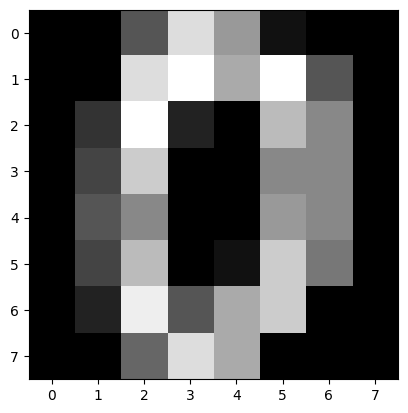

In [4]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [5]:
X = np.concatenate([digits.data, np.ones((digits.data.shape[0],1))], axis=1)
y = digits.target
X.shape

(1797, 65)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=64, random_state=42, stratify=y)

In [7]:
X_train.shape

(1733, 65)

In [8]:
y_train.shape

(1733,)

In [9]:
lamb=1e0
kernel = np.linalg.inv(X_train.T@X_train+lamb*np.diag(np.ones(X_train.shape[1])))
theta = kernel@X_train.T@y_train

In [10]:
M = (1-X_train@kernel@X_train.T).diagonal()

In [11]:
r = y_train - X_train@theta

In [12]:
loo = kernel@X_train[0]*r[0]/M[0]
loo

array([-0.00000000e+00,  5.31728507e-04, -9.59827310e-04,  7.50090602e-04,
        1.09026060e-04,  6.64777444e-05, -4.30260721e-05, -1.72573866e-04,
       -1.66933492e-03,  1.75758318e-04, -2.02838650e-04, -3.85128568e-04,
        6.03565460e-04, -1.03835398e-04,  1.26626383e-04, -1.67673417e-05,
        4.27838693e-04,  8.47497461e-05,  3.30954547e-04, -1.35466256e-04,
       -8.49667206e-05, -3.17718748e-05,  4.57271218e-05,  1.04534815e-05,
       -7.36547011e-03,  4.49738751e-04, -5.73503934e-04, -1.21641394e-04,
        1.57047896e-05,  1.40222904e-04, -1.71877407e-04,  1.62456834e-03,
       -0.00000000e+00,  8.44524399e-05,  1.70821975e-04,  1.64741247e-04,
       -4.34078510e-04,  2.08705660e-04, -5.56561703e-04, -0.00000000e+00,
       -1.51539145e-04,  9.30152177e-05, -1.64603911e-04,  8.79652047e-05,
        1.60650891e-04,  2.90751254e-05,  1.53920431e-04, -1.57103026e-04,
       -9.99943739e-05,  1.71028965e-04,  8.16008700e-05, -4.94072203e-05,
       -5.98809926e-05, -

In [13]:
pred = X_val@theta

In [14]:
print(classification_report(pred.astype(int), y_val))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.14      0.11      0.12         9
           2       0.00      0.00      0.00         7
           3       0.14      0.17      0.15         6
           4       0.29      0.17      0.21        12
           5       0.29      0.22      0.25         9
           6       0.33      0.25      0.29         8
           7       0.17      0.14      0.15         7
           8       0.00      0.00      0.00         1
           9       0.17      1.00      0.29         1

    accuracy                           0.19        64
   macro avg       0.19      0.26      0.19        64
weighted avg       0.21      0.19      0.19        64



In [15]:
mean_squared_error(pred, y_val)

2.7531271631730503

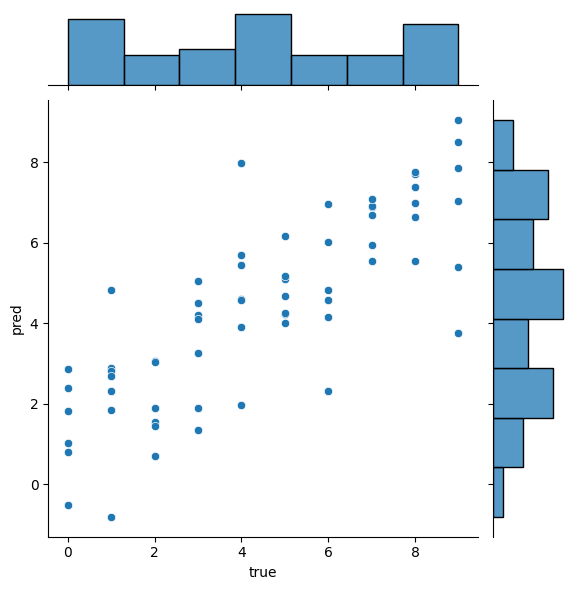

In [16]:

data={
    'true': y_val,
    'pred': pred
}

sns.jointplot(data=data, x='true', y='pred')

In [17]:
kernel_ = np.linalg.inv(X_train[1:].T@X_train[1:]+lamb*np.diag(np.ones(X_train[1:].shape[1])))
theta_ = kernel_@X_train[1:].T@y_train[1:]

In [18]:
(theta - theta_)

array([ 0.00000000e+00,  5.31728507e-04, -9.59827310e-04,  7.50090602e-04,
        1.09026060e-04,  6.64777444e-05, -4.30260721e-05, -1.72573866e-04,
       -1.66933492e-03,  1.75758318e-04, -2.02838650e-04, -3.85128568e-04,
        6.03565460e-04, -1.03835398e-04,  1.26626383e-04, -1.67673420e-05,
        4.27838693e-04,  8.47497461e-05,  3.30954547e-04, -1.35466256e-04,
       -8.49667206e-05, -3.17718748e-05,  4.57271218e-05,  1.04534819e-05,
       -7.36547011e-03,  4.49738751e-04, -5.73503934e-04, -1.21641394e-04,
        1.57047896e-05,  1.40222904e-04, -1.71877407e-04,  1.62456834e-03,
        0.00000000e+00,  8.44524399e-05,  1.70821975e-04,  1.64741247e-04,
       -4.34078510e-04,  2.08705660e-04, -5.56561703e-04,  0.00000000e+00,
       -1.51539145e-04,  9.30152177e-05, -1.64603911e-04,  8.79652047e-05,
        1.60650891e-04,  2.90751254e-05,  1.53920431e-04, -1.57103026e-04,
       -9.99943742e-05,  1.71028965e-04,  8.16008700e-05, -4.94072203e-05,
       -5.98809926e-05, -

In [19]:
prev_loss = (y_val - X_val@theta)**2
prev_loss

array([9.81121882e-03, 1.22241364e+00, 3.89927311e+00, 1.29253497e+01,
       8.25542439e+00, 1.36104258e+00, 4.21606957e+00, 2.75723155e+01,
       3.44803696e+00, 1.00685129e+00, 3.26035280e+00, 1.14607147e+00,
       5.67117955e+00, 3.55934408e-01, 1.30828983e+00, 1.65859169e+00,
       7.09047714e-01, 3.25630224e-01, 1.31099627e-02, 5.90741111e-01,
       1.74620748e+00, 1.11798919e+00, 6.57791329e-01, 1.39256900e+00,
       2.27563080e+00, 1.45493939e+01, 1.42915856e+00, 2.89199480e+00,
       1.05358187e+00, 1.21445461e+00, 3.74394463e-01, 6.60216773e-02,
       1.83316456e+00, 8.06289425e-02, 9.41923912e-01, 1.65581078e-03,
       5.73252628e-02, 2.69667627e+00, 1.35118598e+01, 1.02755250e-02,
       2.09107060e+00, 9.36939517e-02, 2.01594594e+00, 5.88380768e-03,
       1.06464154e+00, 1.09223636e-01, 3.33701641e+00, 2.08003695e-01,
       2.58960810e-01, 3.12216535e-01, 6.06839889e+00, 8.49527526e-03,
       4.15982254e+00, 4.17561942e-04, 3.54312947e+00, 1.11617407e-02,
      

In [20]:
if_list = []
for i in range(X_train.shape[0]):
    loo = kernel@X_train[i]*r[i]/M[i] # !!!!!!!!!!!!!!!!!

    if i==0:
        print(loo)
    current_loss = (y_val - X_val@(theta-loo))**2
    if_list.append(prev_loss-current_loss)


[-0.00000000e+00  5.31728507e-04 -9.59827310e-04  7.50090602e-04
  1.09026060e-04  6.64777444e-05 -4.30260721e-05 -1.72573866e-04
 -1.66933492e-03  1.75758318e-04 -2.02838650e-04 -3.85128568e-04
  6.03565460e-04 -1.03835398e-04  1.26626383e-04 -1.67673417e-05
  4.27838693e-04  8.47497461e-05  3.30954547e-04 -1.35466256e-04
 -8.49667206e-05 -3.17718748e-05  4.57271218e-05  1.04534815e-05
 -7.36547011e-03  4.49738751e-04 -5.73503934e-04 -1.21641394e-04
  1.57047896e-05  1.40222904e-04 -1.71877407e-04  1.62456834e-03
 -0.00000000e+00  8.44524399e-05  1.70821975e-04  1.64741247e-04
 -4.34078510e-04  2.08705660e-04 -5.56561703e-04 -0.00000000e+00
 -1.51539145e-04  9.30152177e-05 -1.64603911e-04  8.79652047e-05
  1.60650891e-04  2.90751254e-05  1.53920431e-04 -1.57103026e-04
 -9.99943739e-05  1.71028965e-04  8.16008700e-05 -4.94072203e-05
 -5.98809926e-05 -1.02520339e-04  7.80323957e-05  1.09378215e-03
 -2.25699991e-03  6.51346217e-05  3.48899688e-04 -2.68654052e-04
  9.43505022e-05 -9.60909

In [21]:
if_array = np.vstack(if_list).T
if_array.shape

(64, 1733)

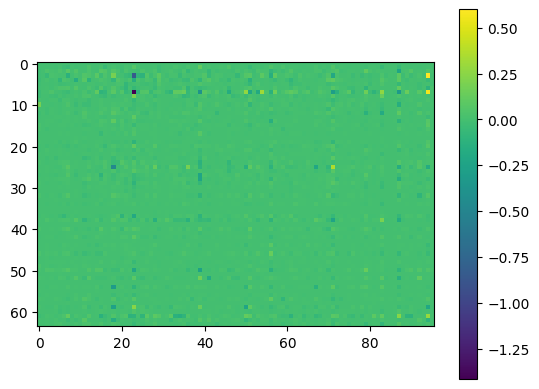

In [22]:
plt.imshow(if_array[:, :96])
plt.colorbar()

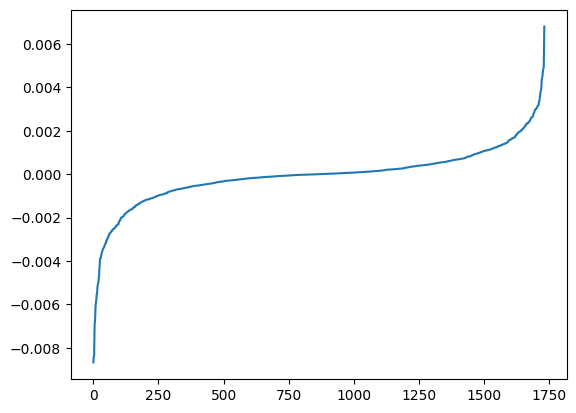

In [23]:
i = 0
plt.plot(sorted(if_array[i]))

In [24]:
import matplotlib.pyplot as plt


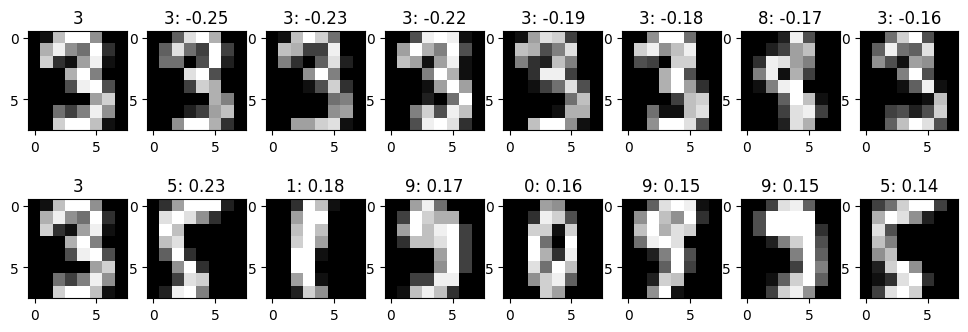

In [25]:
i = 6

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
axes[0, 0].imshow(X_val[i][:64].reshape(8, 8), cmap='gray')
axes[0, 0].set_title(y_val[i])

axes[1, 0].imshow(X_val[i][:64].reshape(8, 8), cmap='gray')
axes[1, 0].set_title(y_val[i])

tmp = np.argsort(if_array[i])

for j in range(1, 8):
    indice = tmp[j-1]
    axes[0, j].imshow(X_train[indice][:64].reshape(8, 8), cmap='gray')
    axes[0, j].set_title("{}: {}".format(y_train[indice], np.round(if_array[i][indice], 2)))

tmp = np.argsort(if_array[i])[::-1]
for j in range(1, 8):
    indice = tmp[j-1]
    axes[1, j].imshow(X_train[indice][:64].reshape(8, 8), cmap='gray')
    axes[1, j].set_title("{}: {}".format(y_train[indice], np.round(if_array[i][indice], 2)))